In [ ]:
'''
this model is to understand the basics of how a ResNet architecture works. Modified code from PyTorch (https://pytorch.org/hub/pytorch_vision_resnet/).
Some occasional errors with this network as it was built for a lot of different animals and types of dogs as well.
'''

import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

test = load_dataset("ajinkyakolhe112/dog_breed_classification_kaggle", split="train") # using train split because it actually has the label with what the expected output is supposed to be
test = test.shuffle(seed=42)



In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-12-24 02:51:18--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-12-24 02:51:18 (106 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
from torchvision import transforms

def network(filename):


  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(filename)
  input_batch = input_tensor.unsqueeze(0)


  torch.device('cuda')

  with torch.no_grad():
      output = model(input_batch)


  # get possibilities
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  return probabilities


def getOutputs(probabilities, value):
  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  for i in range(top5_prob.size(0)):
      print(categories[top5_catid[i]] + ": " + str(top5_prob[i].item()*100) + "%")

  # print if the output is correct or not
  categories[top5_catid[0]] = categories[top5_catid[0]].lower() # converts label to lowercase, since the first letter in all labels in imagenet_classes.txt is uppercase.

  if (categories[top5_catid[0]] == (value)):
    print("CORRECT")
  else:
    print("INCORRECT | Answer is: " + value)



Image 1:


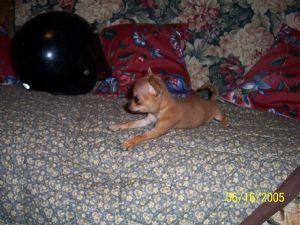

miniature pinscher: 17.631082236766815%
Chihuahua: 13.980732858181%
toy terrier: 11.912153661251068%
redbone: 5.4195307195186615%
American Staffordshire terrier: 3.6399967968463898%
INCORRECT | Answer is: chihuahua



Image 2:


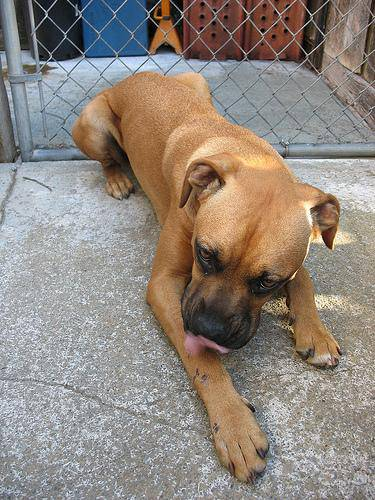

boxer: 22.269386053085327%
bull mastiff: 21.02377414703369%
Rhodesian ridgeback: 16.123175621032715%
American Staffordshire terrier: 15.72875827550888%
Staffordshire bullterrier: 13.351255655288696%
CORRECT



Image 3:


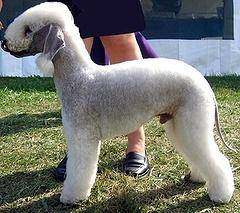

Bedlington terrier: 91.80063605308533%
standard poodle: 4.89080436527729%
Kerry blue terrier: 2.2091999650001526%
miniature poodle: 0.3988829907029867%
wire-haired fox terrier: 0.29037350323051214%
CORRECT



Image 4:


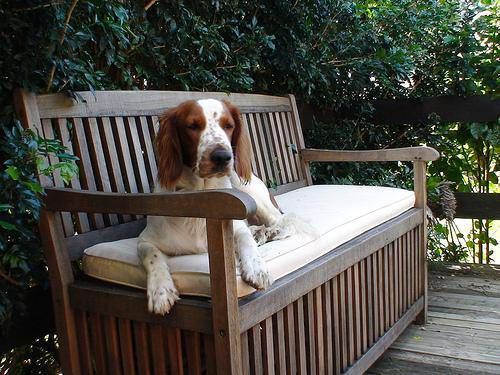

Welsh springer spaniel: 83.444344997406%
Brittany spaniel: 9.948799014091492%
basset: 5.446244031190872%
English springer: 0.5057878792285919%
clumber: 0.3009541891515255%
CORRECT



Image 5:


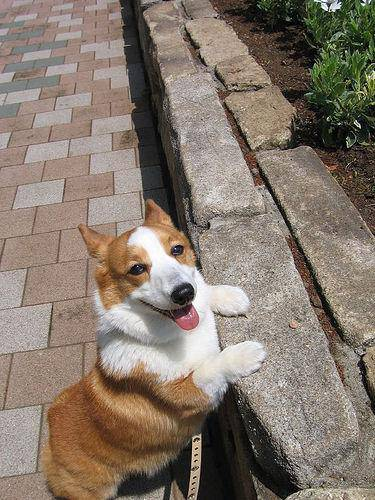

Pembroke: 89.24612998962402%
Cardigan: 9.955711662769318%
Chihuahua: 0.26145915035158396%
basenji: 0.05819055950269103%
doormat: 0.051992275984957814%
CORRECT



Image 6:


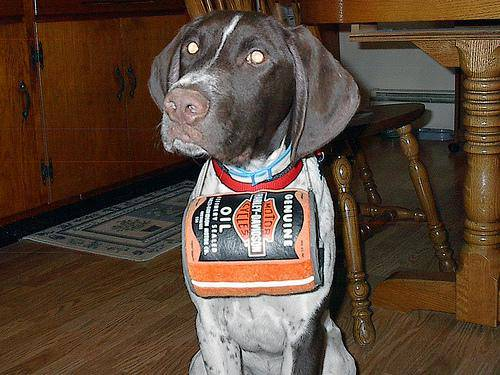

German short-haired pointer: 94.50563192367554%
Labrador retriever: 2.9827849939465523%
Chesapeake Bay retriever: 0.9513772092759609%
Weimaraner: 0.68125962279737%
American Staffordshire terrier: 0.3191127208992839%
CORRECT



Image 7:


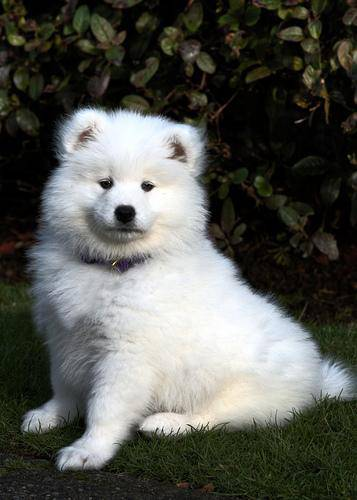

Samoyed: 96.77777886390686%
Arctic fox: 1.4216026291251183%
white wolf: 0.7445203140377998%
Pomeranian: 0.26861533988267183%
keeshond: 0.2455078298225999%
CORRECT



Image 8:


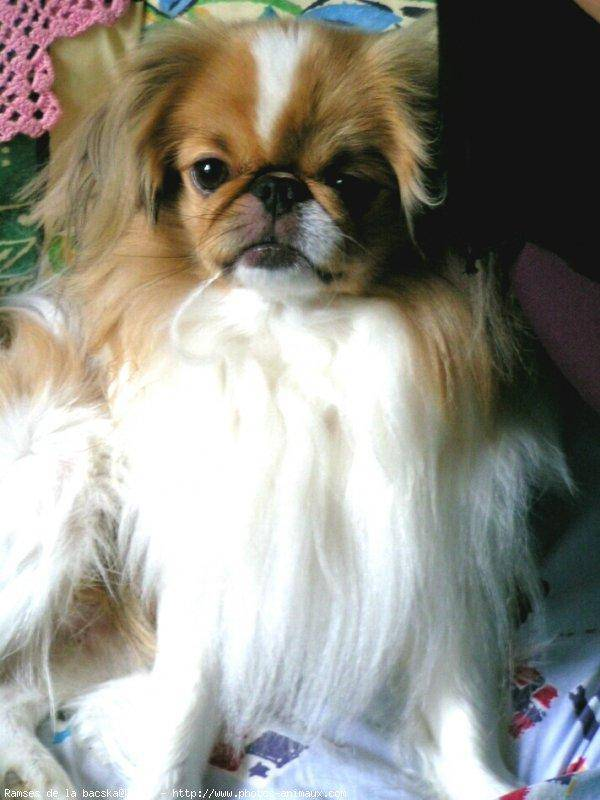

Japanese spaniel: 76.77881121635437%
Pekinese: 21.470187604427338%
papillon: 0.7677060551941395%
Shih-Tzu: 0.5777704995125532%
Blenheim spaniel: 0.22658465895801783%
CORRECT



Image 9:


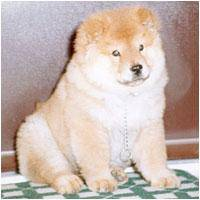

chow: 99.52545166015625%
lion: 0.2166737336665392%
dingo: 0.07264065789058805%
Pomeranian: 0.06591936107724905%
Tibetan mastiff: 0.023779700859449804%
CORRECT



Image 10:


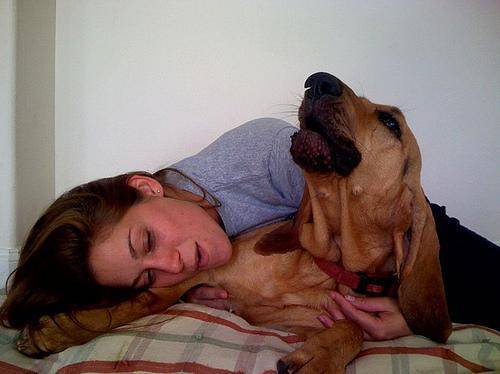

bloodhound: 86.5345299243927%
redbone: 7.018350064754486%
bull mastiff: 2.1163396537303925%
Rhodesian ridgeback: 1.69480349868536%
boxer: 0.38901413790881634%
CORRECT





In [12]:
import time

labels = test.features["label"]._int2str

for x in range(10):
    print("Image " + str(x+1) + ":")
    filename = test[x]["image"]
    display(filename)

    value = test[x]["label"] # gets what type of dog the image actually is
    value = labels[value]
    value = value.replace("_", " ")

    probabilities = network(filename)
    getOutputs(probabilities, value)


    print("\n\n" )

    time.sleep(2.5)